In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

cacao = pd.read_csv('cacao_flavors.csv')

In [29]:
display(cacao.head(10))
cacao.info()

,Bar id,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,1,A. Morin,Agua Grande,1876,2016,63%,France,11.50,,Sao Tome
1,2,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,3,A. Morin,Atsane,1676,2015,670%,France,3.00,,Togo
3,4,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,5,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
5,6,A. Morin,Carenero,1315,2014,70%,France,2.75,Criollo,Venezuela
6,7,A. Morin,Cuba,1315,2014,70%,France,3.50,,Cuba
7,8,A. Morin,Sur del Lago,1315,2014,70%,France,11.50,Criollo,Venezuela
8,9,,Puerto Cabello,1319,2014,70%,France,3.75,Criollo,Venezuela
9,10,A. Morin,Pablino,1319,2014,70%,France,4.00,,Peru


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Bar id                            1795 non-null   int64  
 1   Company (Maker-if known)          1795 non-null   object 
 2   Specific Bean Origin or Bar Name  1795 non-null   object 
 3   REF                               1795 non-null   int64  
 4   Review Date                       1795 non-null   int64  
 5   Cocoa Percent                     1795 non-null   object 
 6   Company Location                  1795 non-null   object 
 7   Rating                            1795 non-null   float64
 8   Bean Type                         1794 non-null   object 
 9   Broad Bean Origin                 1794 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 140.4+ KB


In [30]:
cacao.columns = ['bar_id', 'company', 'specific_origin', 'ref', 'review_date',
                 'cocoa_percent', 'company_location', 'rating', 'bean_type', 'broad_origin']

1795


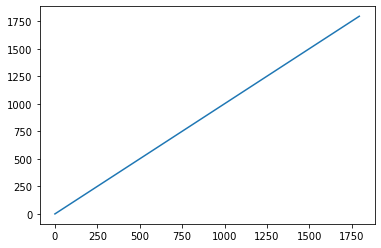

In [31]:
print(cacao.bar_id.nunique())
plt.plot(cacao.bar_id)

In [32]:
cacao.drop('bar_id', inplace=True, axis = 1)
cacao.sample(5)

,company,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin
111,Arete,,1928,2016,73%,U.S.A.,3.25,,Vietnam
395,,Uganda,1760,2016,70%,U.S.A.,2.75,,Uganda
637,Ethereal,Ecuador,1275,2014,80%,U.S.A.,3.50,,Ecuador
62,Amano,Ocumare,175,2007,70%,U.S.A.,3.75,Criollo,Venezuela
128,Artisan du Chocolat,Ba Ria Vung Tau Province,600,2010,72%,U.K.,3.25,Trinitario,Vietnam


In [33]:
pd.DataFrame(cacao.company.value_counts())

,company
,99
Soma,45
Fresco,26
Bonnat,26
Pralus,25
...,...
Cacao de Origin,1
Park 75,1
ChocoReko,1
Nanea,1


In [34]:
cacao.company = cacao.company.apply(lambda x: None if x.strip()=='' else x)

In [38]:
display(pd.DataFrame(cacao.company.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (cacao.company.value_counts()>10).sum())
cacao.loc[:,['company']].info()

,company
Soma,45
Bonnat,26
Fresco,26
Pralus,25
Domori,22
...,...
Jordis,1
Cacao de Origin,1
Park 75,1
ChocoReko,1


Значений, встретившихся в столбце более 10 раз: 30
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   company  1696 non-null   object
dtypes: object(1)
memory usage: 14.1+ KB


In [48]:
good_sample = cacao.company.value_counts()

good_sample[good_sample > 10].sum()

517

In [52]:
cacao.specific_origin.value_counts()
cacao.specific_origin = cacao.specific_origin.apply(lambda x: None if x.strip() == '' else x)


Madagascar                          55
Peru                                44
Ecuador                             39
Dominican Republic                  33
Venezuela                           21
                                    ..
Java, Indonesian Black               1
Morropon, Norandiono Coop, Piura     1
Cacao Verapaz                        1
Peru, Las Pampas P.                  1
Tawau, Oct. 2015 Harvest             1
Name: specific_origin, Length: 1012, dtype: int64

In [60]:
(cacao.specific_origin.value_counts()>10).sum()

15

count    1795.000000
mean     1035.904735
std       552.886365
min         5.000000
25%       576.000000
50%      1069.000000
75%      1502.000000
max      1952.000000
Name: ref, dtype: float64

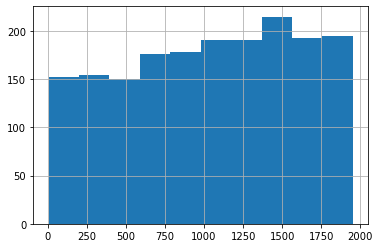

In [61]:
cacao.ref.hist()
cacao.ref.describe()

count    1795.000000
mean     2012.325348
std         2.927210
min      2006.000000
25%      2010.000000
50%      2013.000000
75%      2015.000000
max      2017.000000
Name: review_date, dtype: float64

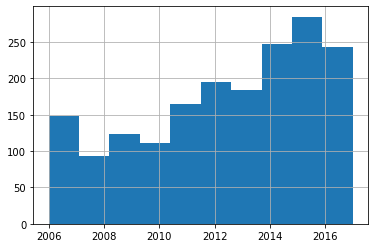

In [62]:
cacao.review_date.hist()
cacao.review_date.describe()

In [63]:
cacao.cocoa_percent = cacao.cocoa_percent.apply(lambda x: float(x.replace('%', '')))

count    1795.000000
mean       75.932312
std        44.475981
min        42.000000
25%        70.000000
50%        70.000000
75%        75.000000
max       682.000000
Name: cocoa_percent, dtype: float64

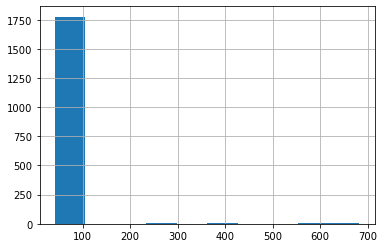

In [64]:
cacao.cocoa_percent.hist()
cacao.cocoa_percent.describe()

25-й перцентиль: 70.0, 75-й перцентиль: 75.0, IQR: 5.0,  Границы выбросов: [62.5, 82.5].


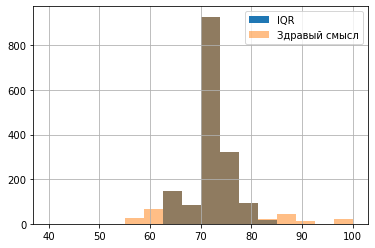

In [65]:
IQR = cacao.cocoa_percent.quantile(0.75) - cacao.cocoa_percent.quantile(0.25)
perc25 = cacao.cocoa_percent.quantile(0.25)
perc75 = cacao.cocoa_percent.quantile(0.75)
 
print(
'25-й перцентиль: {},'.format(perc25),
'75-й перцентиль: {},'.format(perc75),
"IQR: {}, ".format(IQR),
"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
cacao.cocoa_percent.loc[cacao.cocoa_percent.between(
perc25 - 1.5*IQR,
perc75 + 1.5*IQR)].hist(bins = 16, range = (40, 100), label = 'IQR')
 
cacao.cocoa_percent.loc[cacao.cocoa_percent <= 100].hist(
alpha = 0.5, bins = 16, range = (40, 100), label = 'Здравый смысл')
 
plt.legend();

In [66]:
cacao = cacao.loc[cacao.cocoa_percent <= 100]

In [71]:
display(pd.DataFrame(cacao.company_location.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", 
           (cacao.company_location.value_counts()>10).sum())
cacao.loc[:,['company_location']].info()
      

,company_location
U.S.A.,756
France,155
Canada,124
U.K.,94
Italy,63
...,...
Russia,1
Ghana,1
Eucador,1
Wales,1


Значений, встретившихся в столбце более 10 раз: 22
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1776 entries, 0 to 1794
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   company_location  1776 non-null   object
dtypes: object(1)
memory usage: 27.8+ KB


count    1776.000000
mean        3.425816
std         1.759007
min         1.000000
25%         3.000000
50%         3.250000
75%         3.500000
max        19.750000
Name: rating, dtype: float64

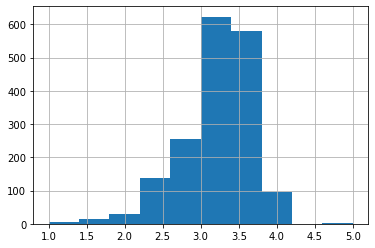

In [77]:
cacao.rating.loc[cacao.rating <= 5].hist()
cacao.rating.describe()

Здесь я не согласен с подходом удаления нижних выбросов, т.к. они могут быть информативны, но буду делать как по упражнению.

<AxesSubplot:>

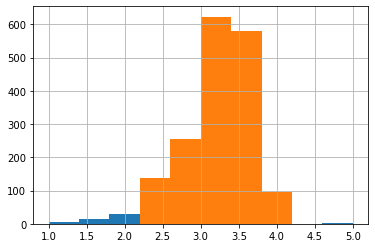

In [80]:
cacao.rating.loc[cacao.rating <= 5].hist(bins=10, range = (1, 5))

q1 = cacao.rating.quantile(0.25)
q3 = cacao.rating.quantile(0.75)
IQR = q3 - q1

cacao.rating.loc[cacao.rating.between(q1 - 1.5*IQR, q3 + 1.5*IQR)].hist(bins=10, range = (1, 5))

25-й перцентиль: 3.0, 75-й перцентиль: 3.5, IQR: 0.5,  Границы выбросов: [2.25, 4.25].


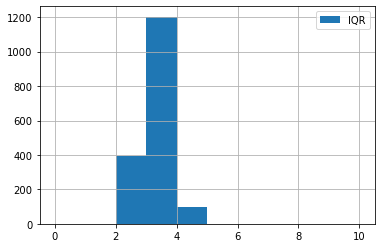

In [82]:
IQR = cacao.rating.quantile(0.75) - cacao.rating.quantile(0.25)
perc25 = cacao.rating.quantile(0.25)
perc75 = cacao.rating.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75), "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
cacao.rating.loc[cacao.rating.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (0, 10), label = 'IQR')
 
plt.legend();

In [83]:
cacao = cacao.loc[cacao.rating.between(q1 - 1.5*IQR, q3 + 1.5*IQR)]

In [84]:
cacao.bean_type = cacao.bean_type.astype(str).apply(lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(cacao.bean_type.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (cacao.bean_type.value_counts()>10).sum())
print("Уникальных значений:", cacao.bean_type.nunique())
cacao.loc[:, ['bean_type']].info()

,bean_type
Trinitario,401
Criollo,147
Forastero,81
Forastero (Nacional),50
"Criollo, Trinitario",37
Blend,36
Forastero (Arriba),30
Criollo (Porcelana),10
"Trinitario, Criollo",9
Forastero (Parazinho),8


Значений, встретившихся в столбце более 10 раз: 7
Уникальных значений: 41
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 1 to 1794
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   bean_type  861 non-null    object
dtypes: object(1)
memory usage: 26.4+ KB


In [85]:
cacao.bean_type = cacao.bean_type.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
                      else x if '(' not in x else x[:x.find('(')].strip())

In [86]:
display(pd.DataFrame(cacao.bean_type.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (cacao.bean_type.value_counts()>10).sum())
print("Уникальных значений:", cacao.bean_type.nunique())
cacao.loc[:, ['bean_type']].info()

,bean_type
Trinitario,405
Forastero,179
Criollo,165
"Criollo, Trinitario",37
Blend,36
"Trinitario, Criollo",9
Nacional,5
Matina,3
EET,3
Beniano,3


Значений, встретившихся в столбце более 10 раз: 5
Уникальных значений: 21
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 1 to 1794
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   bean_type  860 non-null    object
dtypes: object(1)
memory usage: 26.4+ KB
